In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
from scipy import signal
from scipy import fft
from scipy import interpolate
from scipy import stats

plt.rcParams["figure.figsize"]=10,5

In [2]:
def my_round(X , DX) :

    if np.log10(DX)>0 : 
        Ndecimal = 1 - np.int(np.ceil(np.abs(np.log10(DX))))
    else : 
        Ndecimal = np.int(np.ceil(np.abs(np.log10(DX))))
    
    if Ndecimal == 0 : 
        DX = np.int(np.around( DX , Ndecimal ))
        X = np.int(np.around( X , Ndecimal ))
    else : 
        DX = np.around( DX , Ndecimal )
        X = np.around( X , Ndecimal )
        
    return X , DX



def Affine(P,x) :
    return P[0] * x + P[1]

<IPython.core.display.Javascript object>


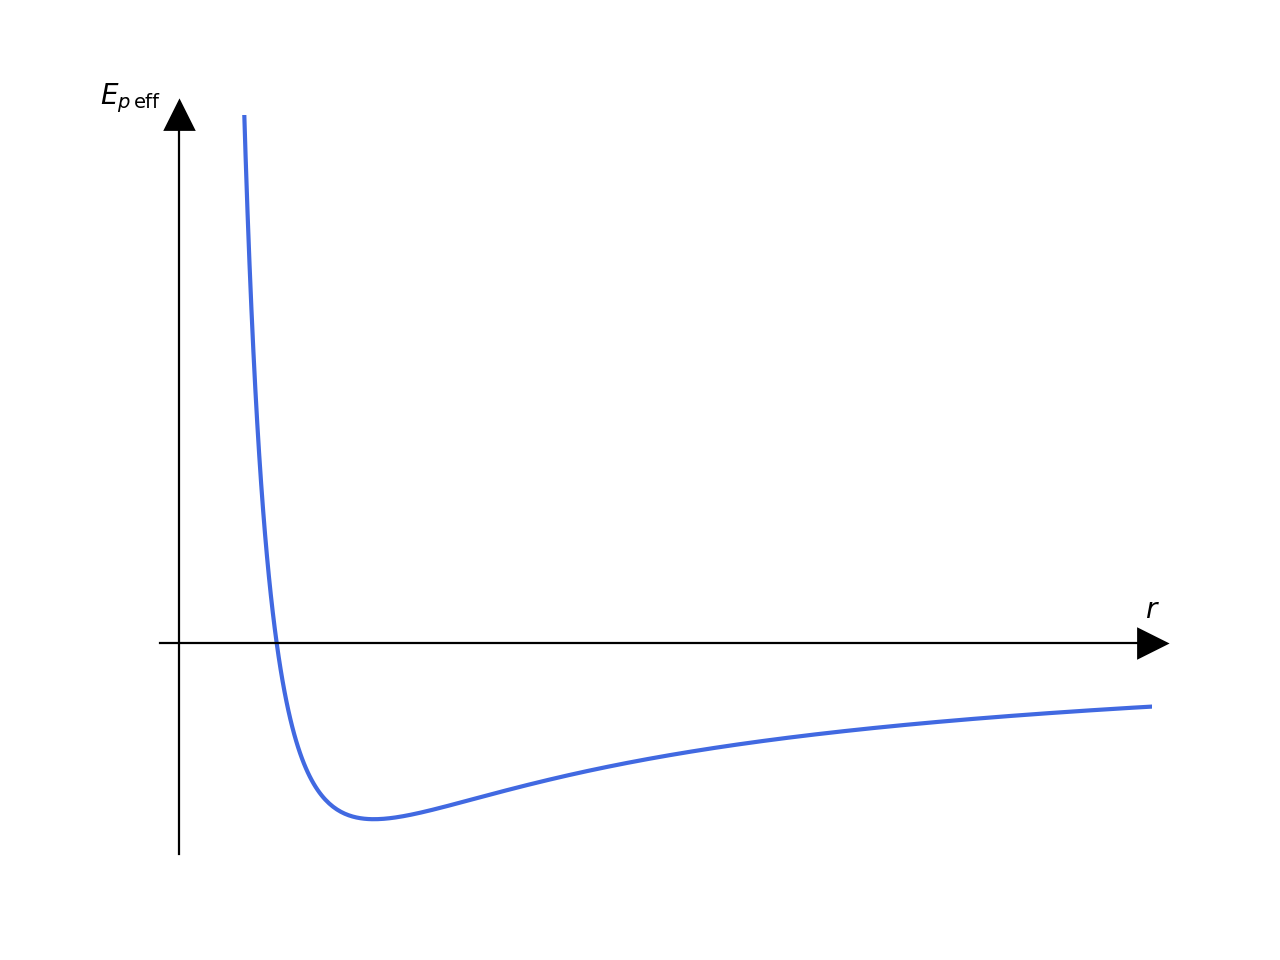

In [3]:
r = np.arange(0.01,10.,0.01)
Epeff = (1. / r**2) - (2. / r)

%matplotlib notebook
fig, ax = plt.subplots()

#Changer la forme des axes
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Faire les flèches
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",transform=ax.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)



plt.xlim(-0.1,5)
plt.ylim(-1.2,3)
    
plt.ylabel('$E_{p\, \mathrm{eff}}$',rotation=0)
plt.xlabel('$r$')

ax.xaxis.set_label_coords(1, 0.35)
ax.yaxis.set_label_coords(-0.03, 1)

ax.plot (r, Epeff, 'royalblue')

plt.savefig('Epeff.pdf',format='pdf', transparent=True)
plt.show()

#############################

Trajectoires : 

<IPython.core.display.Javascript object>


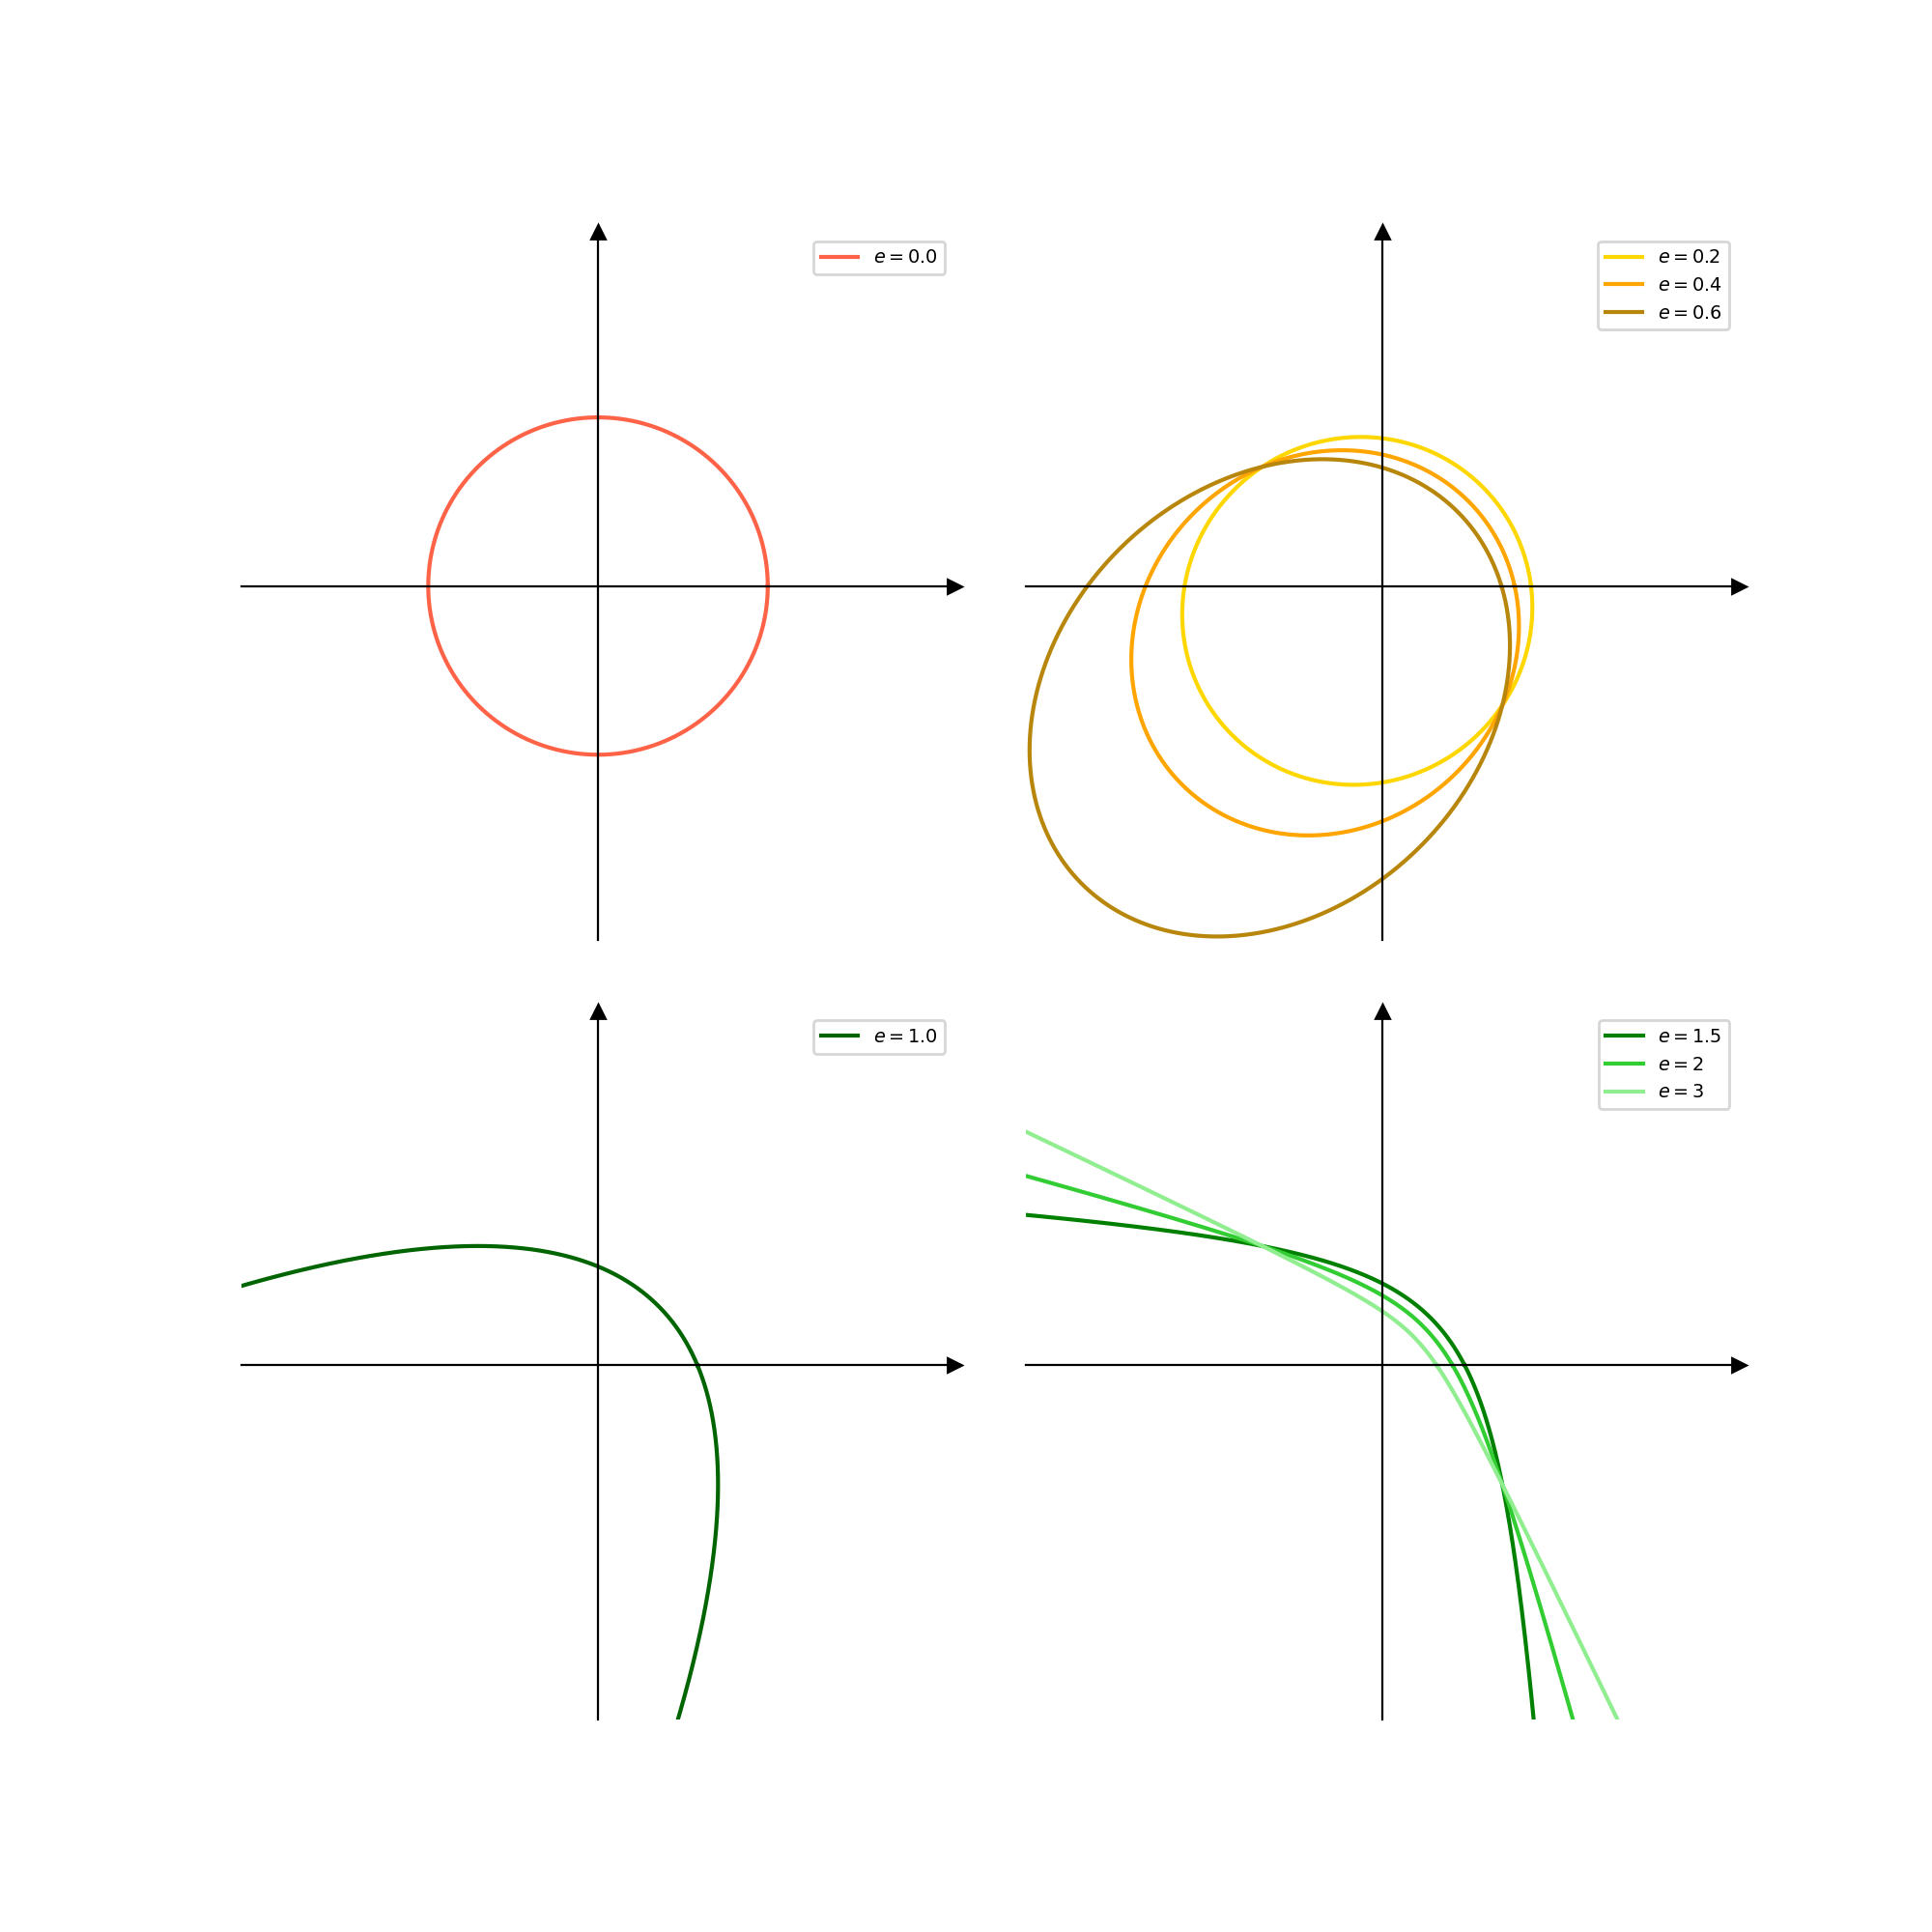

In [4]:
theta = np.arange(0.,2*np.pi, 0.001)
theta0 = np.pi/4.

def rcalc(theta,e) : 
    r = 1. / (1. + e * np.cos(theta - theta0))
    return r


plt.rcParams["figure.figsize"]=10,10
%matplotlib notebook
plt.figure()

borne=2.1

ax1 = plt.subplot(221)

#Changer la forme des axes
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
# Faire les flèches
ax1.plot((1), (0), ls="", marker=">", ms=5, color="k",transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot((0), (1), ls="", marker="^", ms=5, color="k",transform=ax1.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)



ec=0.
Rc = rcalc(theta,ec)
ax1.plot (Rc*np.cos(theta), Rc*np.sin(theta), 'tomato', label='$e=$'+str(ec))

plt.legend(fontsize='x-small')

plt.xlim(-borne,borne)
plt.ylim(-borne,borne)



ax2=plt.subplot(222)

#Changer la forme des axes
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
# Faire les flèches
ax2.plot((1), (0), ls="", marker=">", ms=5, color="k",transform=ax2.get_yaxis_transform(), clip_on=False)
ax2.plot((0), (1), ls="", marker="^", ms=5, color="k",transform=ax2.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)


e=0.2
R = rcalc(theta,e)
ax2.plot (R*np.cos(theta), R*np.sin(theta), 'gold', label='$e=$'+str(e))

e=0.4
R = rcalc(theta,e)
ax2.plot (R*np.cos(theta), R*np.sin(theta), 'orange', label='$e=$'+str(e))

ee=0.6
Re = rcalc(theta,ee)
ax2.plot (Re*np.cos(theta), Re*np.sin(theta), 'darkgoldenrod', label='$e=$'+str(ee))

plt.xlim(-borne,borne)
plt.ylim(-borne,borne)

plt.legend(fontsize='x-small')


ax3=plt.subplot(223)

#Changer la forme des axes
ax3.spines['left'].set_position('zero')
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('zero')
ax3.spines['top'].set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
# Faire les flèches
ax3.plot((1), (0), ls="", marker=">", ms=5, color="k",transform=ax3.get_yaxis_transform(), clip_on=False)
ax3.plot((0), (1), ls="", marker="^", ms=5, color="k",transform=ax3.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)


ep=1.
Rp = rcalc(theta,ep)
ax3.plot (Rp*np.cos(theta), Rp*np.sin(theta), 'darkgreen', label='$e=$'+str(ep))

plt.xlim(-borne,borne)
plt.ylim(-borne,borne)

plt.legend(fontsize='x-small')


ax4=plt.subplot(224)

#Changer la forme des axes
ax4.spines['left'].set_position('zero')
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_position('zero')
ax4.spines['top'].set_visible(False)
ax4.xaxis.set_ticks_position('bottom')
ax4.yaxis.set_ticks_position('left')
# Faire les flèches
ax4.plot((1), (0), ls="", marker=">", ms=5, color="k",transform=ax4.get_yaxis_transform(), clip_on=False)
ax4.plot((0), (1), ls="", marker="^", ms=5, color="k",transform=ax4.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)


e=1.5
R = rcalc(theta,e)
ax4.plot (R[R>=0.]*np.cos(theta[R>=0.]), R[R>=0.]*np.sin(theta[R>=0.]), 'green', label='$e=$'+str(e))

e=2
R = rcalc(theta,e)
ax4.plot (R[R>=0.]*np.cos(theta[R>=0.]), R[R>=0.]*np.sin(theta[R>=0.]), 'limegreen', label='$e=$'+str(e))

eh=3
Rh = rcalc(theta,eh)
ax4.plot (Rh[Rh>=0.]*np.cos(theta[Rh>=0.]), Rh[Rh>=0.]*np.sin(theta[Rh>=0.]), 'lightgreen', label='$e=$'+str(eh))

plt.xlim(-borne,borne)
plt.ylim(-borne,borne)

plt.legend(fontsize='x-small')

plt.subplots_adjust(wspace=0.1, hspace=0.1) # Ajuster les positions des subplots

plt.show()

##########################
##########################

Application dans le cas déflexion par le Soleil !!



In [9]:
G = 6.674330*10**(-11)       # Constante Gravitationnelle
Msun = 1.989 * 10**(30)      # Masse Soleil
Rsun = 6.9634 * 10**(8)      # Rayon Soleil

v0 = 3*10**(6)               # Vitesse initiale du vaisseau



In [10]:
## Calcul des éléments SANS approximation : 
b = Rsun
M0 = Msun

e = np.sqrt(  v0**4*(b**2)/(G**2 * M0**2)  + 1 ) 
theta0 = np.arccos(1/e)
alpha = -(np.pi - 2*theta0)# le moins viens de l'orientation de l'angle

r0 = b**2 * v0**2 / (G*M0)




3.0412579815043426
0.05797587109933966


<IPython.core.display.Javascript object>


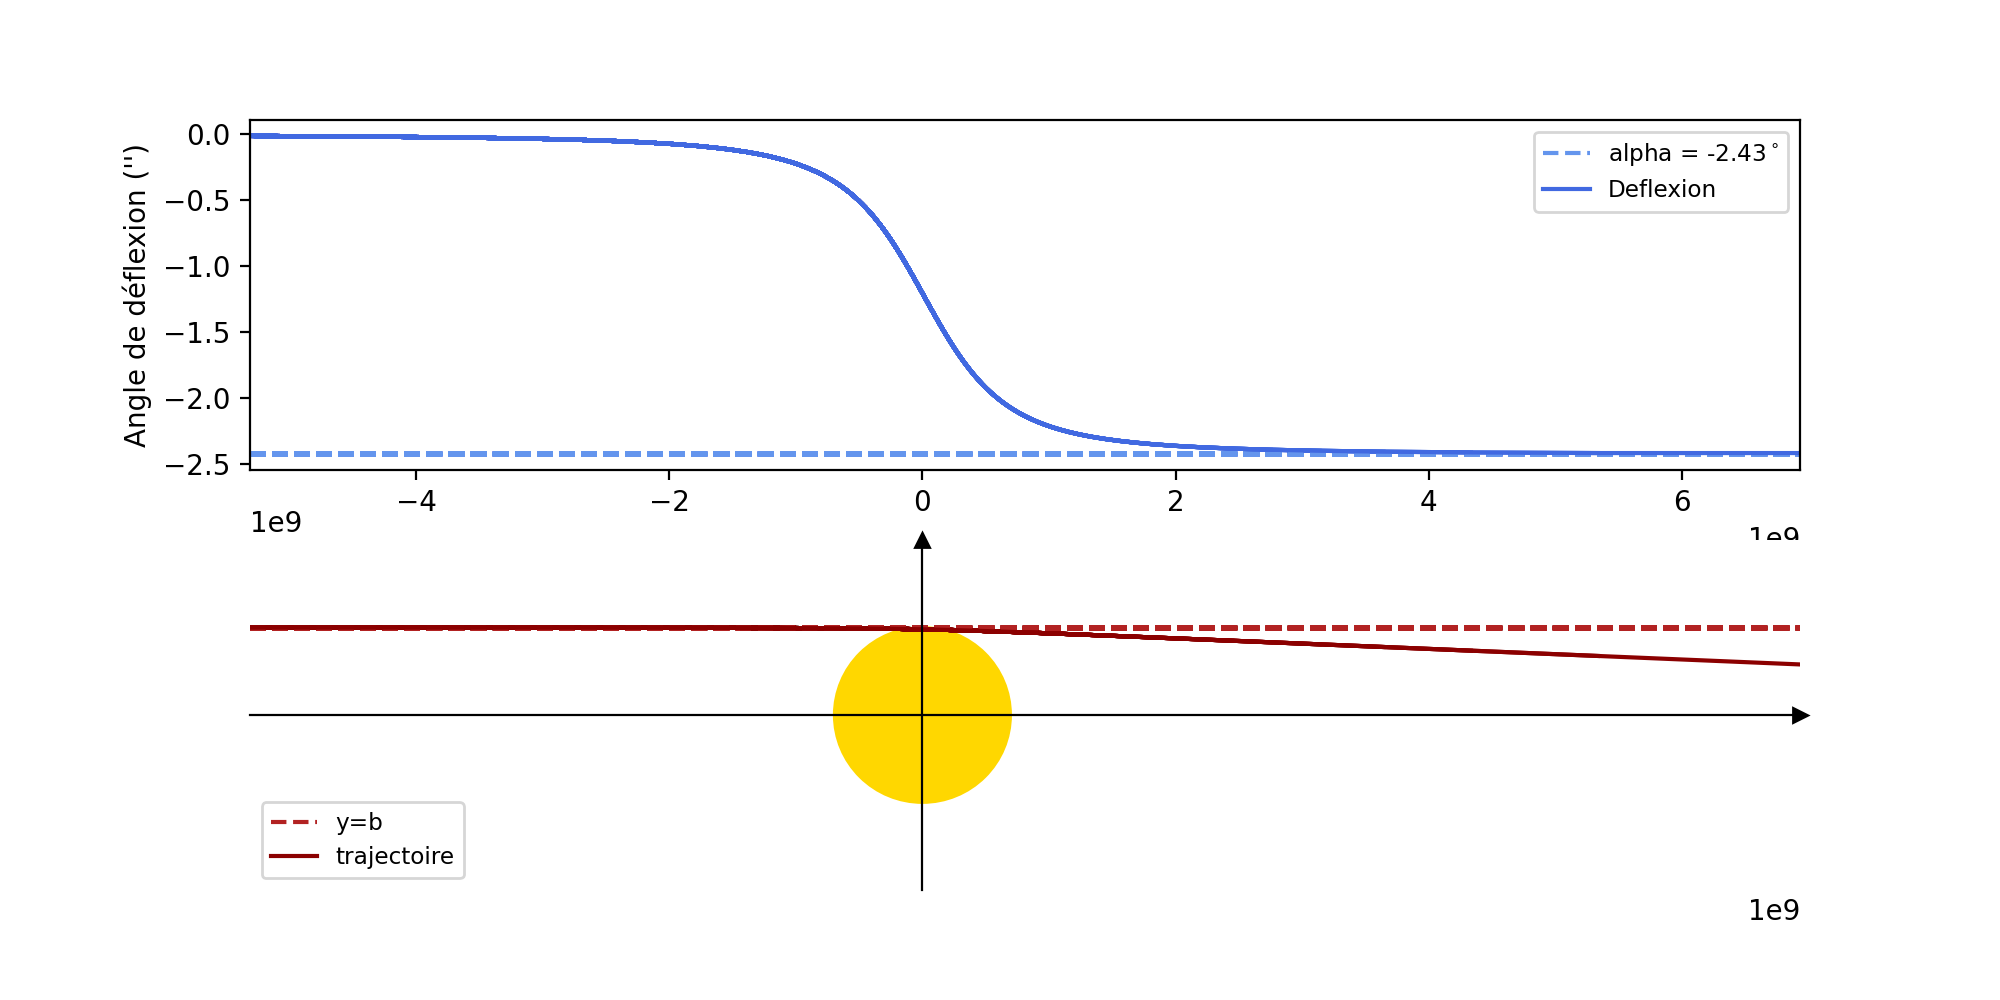

In [17]:
## plot : 

## Limites du plot : 
borne=10*b

theta_approche = np.pi - np.tan(b/borne)
theta_fuite = np.tan(b/borne) + alpha

print(theta_approche)
print(theta_fuite)

theta = np.flip(np.arange(theta_fuite,theta_approche,(theta_approche - theta_fuite)/100. ))
r = r0/ (1 + e * np.cos(theta - theta0) )

x = r * np.cos(theta)
y = r * np.sin(theta)

ycste = np.zeros(len(x)) + b #trajectoire non - deflechie

deflex =  np.arctan(np.diff(y)/np.diff(x)) * (180/np.pi)    # la tangente de l'angle de déflexion vaut dy/dx 
deflex = np.append(deflex,deflex[-1])
Alpha = np.zeros(len(x)) + alpha* (180/np.pi)




fig = plt.figure()
plt.ion()

fig.show()
fig.canvas.draw()

plt.rcParams["figure.figsize"]=15,15 

# Evolution de l'angle de deflexion
ax1 = fig.add_subplot(211)

# Trajectoire 
ax2 = fig.add_subplot(212)

#Changer la forme des axes
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
# Faire les flèches
ax2.plot((1), (0), ls="", marker=">", ms=5, color="k",transform=ax2.get_yaxis_transform(), clip_on=False)
ax2.plot((0), (1), ls="", marker="^", ms=5, color="k",transform=ax2.get_xaxis_transform(), clip_on=False)

# Cacher les ticks et labels
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)

# Plot le soleil 
circle=plt.Circle((0, 0), Rsun, color='gold')
ax2.add_artist(circle)    

ax1.set_ylabel("Angle de déflexion ('')")

for i in range(0,len(theta)+1):
#    ax2.clear()
##    ax.plot(matrix[i,:])
    ax1.plot (x, Alpha, 'cornflowerblue', linestyle='--' ,  label='alpha = '+str(np.round(Alpha[0],2))+'$^\circ$')
    ax1.plot (x[:i], deflex[:i], 'royalblue', label='Deflexion')
    ax1.set_xlim(np.min(x),np.max(x))
#    ax1.set_ylim(1.1*alpha, 0-0.1*alpha)
    if i == 0 : ax1.legend(fontsize='small')

    ax2.plot (x, ycste, 'firebrick', linestyle='--' , label='y=b')
    ax2.plot (x[:i], y[:i], 'darkred', label='trajectoire')
    ax2.set_xlim(np.min(x),np.max(x))
    ax2.set_ylim(-borne/5.,borne/5.)
    if i == 0 : ax2.legend(fontsize='small')
        

    if i == len(theta) : plt.rcParams["figure.figsize"]=10,5
    else : plt.rcParams["figure.figsize"]=10,10  
    fig.canvas.draw()
   
    
